In [ ]:
options(htmltools.dir.version = FALSE)
# source('xaringan2pdf.R')
# xaringan_to_pdf('Chapter2.html')
library(tidyverse)
library(pdfetch)


## Data Type

All data is represented in binary format, by **bits** (TRUE/FALSE, YES/NO, 1/0)

- **Booleans** Direct binary values: `TRUE` or `FALSE` in R
- **Integers**: whole numbers (positive, negative or zero), represented by a fixed-length block of bits
- **Characters** fixed-length blocks of bits, with special coding;
**strings** = sequences of characters
- **Floating point numbers**: a fraction (with a finite number of bits) times an exponent, like $1.87 \times {10}^{6}$, but in binary form
- **Missing or ill-defined values**: `NA`, `NaN`, etc.

---
### More types

`typeof()` function returns the type

`is.`_foo_`()` functions return Booleans for whether the argument is of type _foo_

`as.`_foo_`()` (tries to) "cast" its argument to type _foo_ --- to translate it sensibly into a _foo_-type value

In [ ]:
typeof(7)
is.numeric(7)
is.na(7 / 0)
is.na(0 / 0) # Why is 7/0 not NA, but 0/0 is?


[1] "double"

[1] TRUE

[1] FALSE

[1] TRUE

---

In [ ]:
is.character(7)
is.character("7")
is.character("seven")
is.na("seven")


[1] FALSE

[1] TRUE

[1] TRUE

[1] FALSE

---

In [ ]:
as.character(5 / 6)
as.numeric(as.character(5 / 6))
6 * as.numeric(as.character(5 / 6))
5 / 6 == as.numeric(as.character(5 / 6))


[1] "0.833333333333333"

[1] 0.8333333

[1] 5

[1] FALSE

<small>(why is that last FALSE?)</small>

---
### Data can have names

We can give names to data objects; these give us **variables**

A few variables are built in:

In [ ]:
pi


[1] 3.141593

Variables can be arguments to functions or operators, just like constants:

In [71]:
pi * 10
cos(pi)


[1] 31.41593

[1] -1

---
### Peculiarites of floating-point numbers

The more bits in the fraction part, the more precision

The R floating-point data type is a `double`, a.k.a. `numeric`
<small>back when memory was expensive, the now-standard
number of bits was twice the default</small>

Finite precision $\Rightarrow$ arithmetic on `doubles` $\neq$ arithmetic on $\mathbb{R}$.

In [ ]:
0.45 == 3 * 0.15
0.45 - 3 * 0.15


[1] FALSE

[1] 5.551115e-17

---

Often ignorable, but not always
- Rounding errors tend to accumulate in long calculations
- When results should be $\approx 0$, errors can flip signs
- Usually better to use `all.equal()` than exact comparison

In [ ]:
(0.5 - 0.3) == (0.3 - 0.1)
all.equal(0.5 - 0.3, 0.3 - 0.1)


[1] FALSE

[1] TRUE

---
## Data structures

- Vectors
- Arrays
- Matrices
- Lists
- Dataframes
- Structures of structures

---
### First data structure: vectors

Group related data values into one object, a **data structure**

A **vector** is a sequence of values, all of the same type

In [ ]:
x <- c(7, 8, 10, 45)
x
is.vector(x)


[1]  7  8 10 45

[1] TRUE

---
`c()` function returns a vector containing all its arguments in order

`x[1]` is the first element, `x[4]` is the 4th element  
`x[-4]` is a vector containing all but the fourth element

`vector(length=6)` returns an empty vector of length 6; helpful for filling things up later

In [ ]:
weekly_hours <- vector(length = 5)
weekly_hours[5] <- 8
weekly_hours


[1] 0 0 0 0 8

---

### Vector arithmetic

Operators apply to vectors "pairwise" or "elementwise":

In [ ]:
y <- c(-7, -8, -10, -45)
x + y
x * y


[1] 0 0 0 0

[1]   -49   -64  -100 -2025

---
### Recycling

**Recycling** repeat elements in shorter vector when combined with longer

In [ ]:
x + c(-7, -8)
x
x^c(1, 0, -1, 0.5)


[1]  0  0  3 37

[1]  7  8 10 45

[1] 7.000000 1.000000 0.100000 6.708204

Single numbers are vectors of length 1 for purposes of recycling:

In [ ]:
2 * x


[1] 14 16 20 90

---

Can also do pairwise comparisons:

In [ ]:
x > 9


[1] FALSE FALSE  TRUE  TRUE

Note: returns Boolean vector

Boolean operators work elementwise:

In [ ]:
(x > 9) & (x < 20)


[1] FALSE FALSE  TRUE FALSE

---

To compare whole vectors, best to use `identical()` or `all.equal()`:

In [ ]:
x == -y
identical(x, -y)
identical(c(0.5 - 0.3, 0.3 - 0.1), c(0.3 - 0.1, 0.5 - 0.3))
all.equal(c(0.5 - 0.3, 0.3 - 0.1), c(0.3 - 0.1, 0.5 - 0.3))


[1] TRUE TRUE TRUE TRUE

[1] TRUE

[1] FALSE

[1] TRUE

---

### Addressing vectors

Vector of indices:

In [ ]:
x[c(2, 4)]


[1]  8 45

Vector of negative indices

In [ ]:
x[c(-1, -3)]


[1]  8 45

<small>(why that, and not  `8 10`?)</small>

---

Boolean vector:

In [ ]:
x[x > 9]
y[x > 9]


[1] 10 45

[1] -10 -45

`which()` turns a Boolean vector in vector of TRUE indices:

In [ ]:
places <- which(x > 9)
places
y[places]


[1] 3 4

[1] -10 -45

---
### Named components

You can give names to elements or components of vectors

In [ ]:
names(x) <- c("v1", "v2", "v3", "fred")
names(x)
x[c("fred", "v1")]


[1] "v1"   "v2"   "v3"   "fred"

fred   v1 
  45    7

note the labels in what R prints; not actually part of the value

---

`names(x)` is just another vector (of characters):

In [ ]:
names(y) <- names(x)
sort(names(x))
which(names(x) == "fred")


[1] "fred" "v1"   "v2"   "v3"

[1] 4

---

### Functions on vectors

Lots of functions take vectors as arguments:
- `mean()`, `median()`, `sd()`, `var()`, `max()`, `min()`, `length()`, `sum()`: return single numbers
- `sort()` returns a new vector
- `hist()` takes a vector of numbers and produces a histogram, a highly structured object, with the side-effect of making a plot
- Similarly `ecdf()` produces a cumulative-density-function object
- `summary()` gives a five-number summary of numerical vectors
- `any()` and `all()` are useful on Boolean vectors

Not all functions have (or require) arguments:

In [ ]:
date()


[1] "Thu Jun 26 08:42:22 2025"

---
### Vector structures, starting with arrays

Many data structures in R are made by adding bells and whistles to vectors, so "vector structures"

Most useful: **arrays**

In [137]:
x <- c(7, 8, 10, 45, 1, 2)
x.arr <- array(x, dim = c(2, 3))
x.arr


7,10,1
8,45,2


`dim` says how many rows and columns; filled by columns

Can have $3, 4, \ldots n$ dimensional arrays; `dim` is a length $n$ vector

---

Some properties of the array:

In [138]:
dim(x.arr)
is.vector(x.arr)
is.array(x.arr)


[1] 2 3

[1] FALSE

[1] TRUE

---

In [139]:
typeof(x.arr)
str(x.arr)
attributes(x.arr)


[1] "double"

 num [1:2, 1:3] 7 8 10 45 1 2


$dim
[1] 2 3

In [140]:
typeof(x)
str(x)
attributes(x)

[1] "double"

 num [1:6] 7 8 10 45 1 2


NULL

`typeof()` returns the type of the _elements_

`str()` gives the **structure**: here, a numeric array, with two dimensions, both indexed 1--2, and then the actual numbers

Exercise: try all these with `x`

---
### Accessing and operating on arrays

Can access a 2-D array either by pairs of indices or by the underlying vector:

In [143]:
x.arr[1, 2]
x.arr[3]
x.arr


[1] 10

[1] 10

7,10,1
8,45,2


Omitting an index means "all of it":

In [ ]:
x.arr[c(1:2), 2]
x.arr[, 2]


[1] 10 45

[1] 10 45

---
### Functions on arrays

Using a vector-style function on a vector structure will go down to the underlying vector, _unless_ the function is set up to handle arrays specially:

In [ ]:
which(x.arr > 9)


[1] 3 4

---
Many functions _do_ preserve array structure:

In [145]:
y <- -x
y.arr <- array(y, dim = c(2, 3))
y.arr + x.arr


0,0,0
0,0,0


Others specifically act on each row or column of the array separately:

In [146]:
rowSums(x.arr)


[1] 18 55

<small>We will see a lot more of this idea</small>

---
### Example: Price of houses in PA

Census data for California and Pennsylvania on housing prices,
by Census "tract"

New names:
• `` -> `...1`
Rows: 11275 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): STATEFP, COUNTYFP, TRACTCE, GEO.display.label
dbl (30): ...1, GEO.id2, POPULATION, LATITUDE, LONGITUDE, Median_house_value...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


(Intercept) Median_household_income 
          -26434.729858                3.655054

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 50 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 50 rows containing missing values or values outside the scale range
(`geom_point()`)."


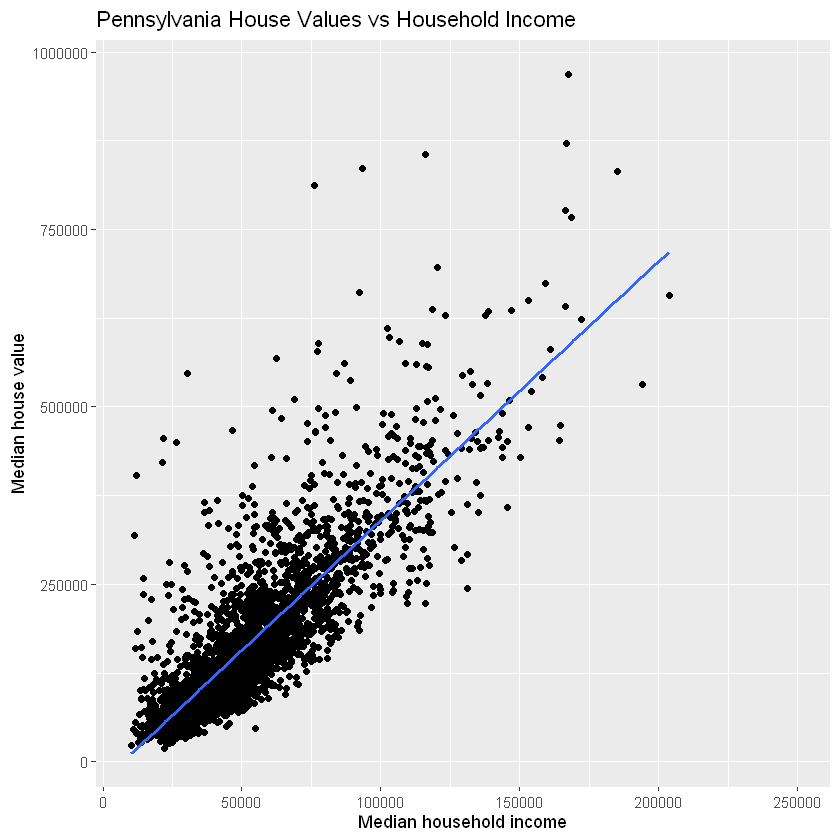

In [147]:
calif_penn <- read_csv("data/calif_penn_2011.csv")
penn <- calif_penn |> filter(STATEFP == "42")
#|> filter(!(Median_household_income < 10000 & Median_house_value > 70000))#calif_penn[calif_penn$STATEFP == '42',]
penn <- penn[!penn$TRACTCE %in% c("961102", "000800"), ]
coefficients(lm(Median_house_value ~ Median_household_income, data = penn))
penn |> ggplot(aes(x = Median_household_income, y = Median_house_value)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) +
    labs(
        x = "Median household income",
        y = "Median house value",
        title = "Pennsylvania House Values vs Household Income"
    )


Fit a simple linear model, predicting median house price from median household income

---
Census tracts 24--425 are Allegheny county

Tract 24 has a median income of `$14,719`; actual median house value is `$34,100` --- is that above or below what's?

In [ ]:
34100 < -26206.564 + 3.651 * 14719


[1] FALSE

Tract 25 has income `$48,102` and house price `$155,900`

In [ ]:
155900 < -26206.564 + 3.651 * 48102


[1] FALSE

What about tract 26?

---

We _could_ just keep plugging in numbers like this, but that's
- boring and repetitive
- error-prone (what if I forget to change the median income, or drop a minus sign from the intercept?)
- obscure if we come back to our work later (what _are_ these numbers?)

Use variables and names
---

In [ ]:
penn.coefs <- coefficients(lm(Median_house_value ~ Median_household_income, data = penn))
penn.coefs


(Intercept) Median_household_income 
          -26434.729858                3.655054

In [ ]:
allegheny.rows <- 24:425
allegheny <- penn |>
  slice(allegheny.rows) |>
  mutate(fitted = penn.coefs["(Intercept)"] +
    penn.coefs["Median_household_income"] * Median_household_income)
allegheny <- allegheny[complete.cases(allegheny), ]


---

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


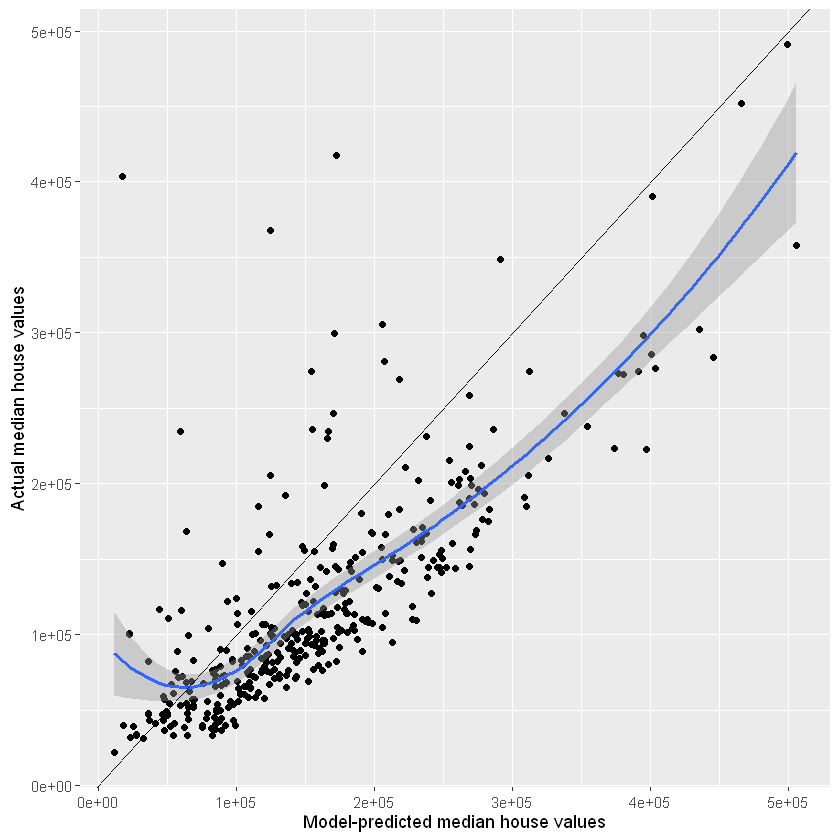

In [ ]:
allegheny |> ggplot(aes(x = fitted, y = Median_house_value)) +
   geom_point() +
   labs(
      x = "Model-predicted median house values",
      y = "Actual median house values"
   ) +
   geom_smooth() +
   geom_abline()


---

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


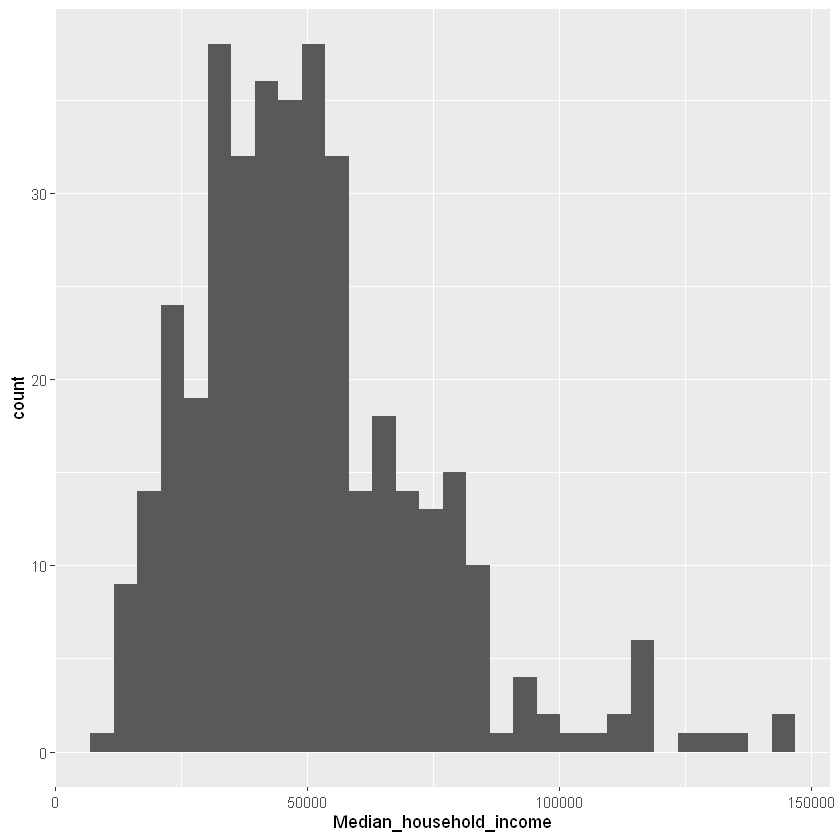

In [ ]:
allegheny |> ggplot(aes(x = Median_household_income)) +
  geom_histogram()


---
### Running example: resource allocation ("mathematical programming")

Factory makes cars and trucks, using labor and steel

- a car takes 40 hours of labor and 1 ton of steel
- a truck takes 60 hours and 3 tons of steel
- resources: 1600 hours of labor and 70 tons of steel each week


---
### Matrices

In R, a matrix is a specialization of a 2D array

In [ ]:
factory <- matrix(c(40, 1, 60, 3), nrow = 2)
is.array(factory)
is.matrix(factory)


[1] TRUE

[1] TRUE

could also specify `ncol`, and/or `byrow=TRUE` to fill by rows.

Element-wise operations with the usual arithmetic and comparison operators
(e.g., `factory/3`)

Compare whole matrices with `identical()` or `all.equal()`

---
### Matrix multiplication

Gets a special operator

In [148]:
six.sevens <- matrix(rep(7, 6), ncol = 3)
six.sevens
factory %*% six.sevens # [2x2] * [2x3]


7,7,7
7,7,7


labor,700,700,700
steel,28,28,28


<small>What happens if you try `six.sevens %*% factory`?</small>

---
### Multiplying matrices and vectors

Numeric vectors can act like proper vectors:

In [ ]:
output <- c(10, 20)
factory %*% output
output %*% factory


1600
70


420,660


<small>R silently casts the vector as either a row or a column matrix</small>

---
### Matrix operators

Transpose:

In [ ]:
t(factory)


40,1
60,3


Determinant:

In [ ]:
det(factory)


[1] 60

---
### The diagonal

The `diag()` function can extract the diagonal entries of a matrix:

In [ ]:
diag(factory)


[1] 40  3

It can also _change_ the diagonal:

In [ ]:
diag(factory) <- c(35, 4)
factory


35,60
1,4


Re-set it for later:

In [ ]:
diag(factory) <- c(40, 3)


---
### Creating a diagonal or identity matrix

In [ ]:
diag(c(3, 4))
diag(2)


3,0
0,4


1,0
0,1


---
### Inverting a matrix

In [ ]:
solve(factory)
factory %*% solve(factory)


0.05000000,-1.0000000
-0.01666667,0.6666667


1,0
0,1


---
### Why's it called "solve"" anyway?

Solving the linear system $\mathbf{A}\vec{x} = \vec{b}$ for $\vec{x}$:

In [ ]:
available <- c(1600, 70)
solve(factory, available)
factory %*% solve(factory, available)


[1] 10 20

1600
70


---
### Names in matrices

We can name either rows or columns or both, with `rownames()` and `colnames()`

These are just character vectors, and we use the same function to get and to set their values

Names help us understand what we're working with

Names can be used to coordinate different objects

---

In [115]:
rownames(factory) <- c("labor", "steel")
colnames(factory) <- c("cars", "trucks")
factory
available <- c(1600, 70)
names(available) <- c("labor", "steel")


,cars,trucks
labor,40,60
steel,1,3


---

In [116]:
output <- c(20, 10)
names(output) <- c("trucks", "cars")
factory %*% output # But we've got cars and trucks mixed up!
factory %*% output[colnames(factory)]
all(factory %*% output[colnames(factory)] <= available[rownames(factory)])


labor,1400
steel,50


labor,1600
steel,70


[1] TRUE

Notice: Last lines don't have to change if we add motorcycles as output or rubber and glass as inputs (abstraction again)

---
### Doing the same thing to each row or column

Take the mean: `rowMeans()`, `colMeans()`: input is matrix,
output is vector.  Also `rowSums()`, etc.

`summary()`: vector-style summary of column

In [ ]:
colMeans(factory)
summary(factory)


cars trucks 
  20.5   31.5

      cars           trucks     
 Min.   : 1.00   Min.   : 3.00  
 1st Qu.:10.75   1st Qu.:17.25  
 Median :20.50   Median :31.50  
 Mean   :20.50   Mean   :31.50  
 3rd Qu.:30.25   3rd Qu.:45.75  
 Max.   :40.00   Max.   :60.00  

---
`apply()`, takes 3 arguments: the array or matrix, then 1 for rows and 2 for columns, then name of the function to apply to each

In [ ]:
rowMeans(factory)
apply(factory, 1, mean)


labor steel 
   50     2

labor steel 
   50     2

<small>What would `apply(factory,1,sd)` do?</small>

---
### Lists

Sequence of values, _not_ necessarily all of the same type

In [ ]:
my.distribution <- list("exponential", 7, FALSE)
my.distribution


[[1]]
[1] "exponential"

[[2]]
[1] 7

[[3]]
[1] FALSE

Most of what you can do with vectors you can also do with lists

---
### Accessing pieces of lists

Can use `[ ]` as with vectors  
or use `[[ ]]`, but only with a single index  
`[[ ]]` drops names and structures, `[ ]` does not

In [ ]:
is.character(my.distribution)
is.character(my.distribution[[1]])
my.distribution[[2]]^2


[1] FALSE

[1] TRUE

[1] 49

<small>What happens if you try `my.distribution[2]^2`?</small>
<small>What happens if you try `[[ ]]` on a vector?</small>

In [151]:
# my.distribution[2]^2
available[[2]]
typeof(my.distribution[2])


[1] 70

[1] "list"

---
### Expanding and contracting lists

Add to lists with `c()` (also works with vectors):

In [ ]:
my.distribution <- c(my.distribution, 7)
my.distribution


[[1]]
[1] "exponential"

[[2]]
[1] 7

[[3]]
[1] FALSE

[[4]]
[1] 7

---
Chop off the end of a list by setting the length to something smaller (also works with vectors):

In [ ]:
length(my.distribution)
length(my.distribution) <- 3
my.distribution


[1] 4

[[1]]
[1] "exponential"

[[2]]
[1] 7

[[3]]
[1] FALSE

---
### Naming list elements

We can name some or all of the elements of a list

In [ ]:
names(my.distribution) <- c("family", "mean", "is.symmetric")
my.distribution
my.distribution[["family"]]
my.distribution["family"]


$family
[1] "exponential"

$mean
[1] 7

$is.symmetric
[1] FALSE

[1] "exponential"

$family
[1] "exponential"

---

Lists have a special short-cut way of using names, `$` (which removes names and structures):

In [ ]:
my.distribution[["family"]]
my.distribution$family


[1] "exponential"

[1] "exponential"

---
### Names in lists (cont'd.)

Creating a list with names:

In [ ]:
another.distribution <- list(family = "gaussian", mean = 7, sd = 1, is.symmetric = TRUE)


Adding named elements:

In [ ]:
my.distribution$was.estimated <- FALSE
my.distribution[["last.updated"]] <- "2011-08-30"


Removing a named list element, by assigning it the value `NULL`:

In [ ]:
my.distribution$was.estimated <- NULL


---
### Key-Value pairs

Lists give us a way to store and look up data by _name_, rather than by _position_

A really useful programming concept with many names: **key-value pairs**, **dictionaries**, **associative arrays**, **hashes**

If all our distributions have components named `family`, we can look that up by name, without caring where it is in the list

---
### Dataframes

Dataframe = the classic data table, $n$ rows for cases, $p$ columns for variables

Lots of the really-statistical parts of R presume data frames
<small>`penn` from last time was really a dataframe</small>

Not just a matrix because *columns can have different types*

Many matrix functions also work for dataframes (`rowSums()`, `summary()`, `apply()`)

<small>but no matrix multiplying dataframes, even if all columns are numeric</small>

---

In [ ]:
a.matrix <- matrix(c(35, 8, 10, 4), nrow = 2)
colnames(a.matrix) <- c("v1", "v2")
a.matrix
a.matrix[, "v1"] # Try a.matrix$v1 and see what happens


v1,v2
35,10
8,4


[1] 35  8

---

In [ ]:
a.data.frame <- data.frame(a.matrix, logicals = c(TRUE, FALSE))
a.data.frame
a.data.frame$v1
a.data.frame[, "v1"]
a.data.frame[1, ]
colMeans(a.data.frame)


v1,v2,logicals
<dbl>,<dbl>,<lgl>
35,10,TRUE
8,4,FALSE


[1] 35  8

[1] 35  8

,v1,v2,logicals
,<dbl>,<dbl>,<lgl>
1,35,10,TRUE


v1       v2 logicals 
    21.5      7.0      0.5

---
### Adding rows and columns

We can add rows or columns to an array or data-frame with `rbind()` and `cbind()`, but be careful about forced type conversions

In [ ]:
rbind(a.data.frame, list(v1 = -3, v2 = -5, logicals = TRUE))
rbind(a.data.frame, c(3, 4, 6))


v1,v2,logicals
<dbl>,<dbl>,<lgl>
35,10,TRUE
8,4,FALSE
-3,-5,TRUE


v1,v2,logicals
<dbl>,<dbl>,<dbl>
35,10,1
8,4,0
3,4,6


---
### Structures of Structures

So far, every list element has been a single data value

List elements can be other data structures, e.g., vectors and matrices:

In [ ]:
plan <- list(factory = factory, available = available, output = output)
plan$output


trucks   cars 
    20     10

Internally, a dataframe is basically a list of vectors

---
### Structures of Structures (cont'd.)

List elements can even be other lists  
which may contain other data structures  
including other lists  
which may contain other data structures...

This **recursion** lets us build arbitrarily complicated data structures from the basic ones

Most complicated objects are (usually) lists of data structures


---
### Example: Eigenstuff

`eigen()` finds eigenvalues and eigenvectors of a matrix  
Returns a list of a vector (the eigenvalues) and a matrix (the eigenvectors)

In [ ]:
eigen(factory)
class(eigen(factory))


eigen() decomposition
$values
[1] 41.556171  1.443829

$vectors
           [,1]       [,2]
[1,] 0.99966383 -0.8412758
[2,] 0.02592747  0.5406062


[1] "eigen"

---
With complicated objects, you can access parts of parts (of parts...)

In [ ]:
factory %*% eigen(factory)$vectors[, 2]
eigen(factory)$values[2] * eigen(factory)$vectors[, 2]
eigen(factory)$values[2]
eigen(factory)[[1]][[2]] # NOT [[1,2]]


labor,-1.2146583
steel,0.7805429


[1] -1.2146583  0.7805429

[1] 1.443829

[1] 1.443829

---
### Summary

- Arrays add multi-dimensional structure to vectors
- Matrices act like you'd hope they would
- Lists let us combine different types of data
- Dataframes are hybrids of matrices and lists, for classic tabular data
- Recursion lets us build complicated data structures out of the simpler ones